# Trabalho de Conclusão de Curso - TCC
### Turma - DSA T212
### Aluno : Drausio Gomes dos Santos
### Orientadora: Gabrielle Maria Romeiro Lombardi
### Tema: Construção e uso de modelos de grafos para representação e análise da estrutura organizacional da administração pública federal.
## Resultados Preliminares

### Etapa 4: Construção dos Grafos
<p> Construção das representações de estruturas organizacionais em grafos.</p>

#### Importando as bibliotecas

In [1]:
!pip install igraph
!pip install pycairo
!pip install cairocffi
!pip install python-igraph

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import time
import datetime as dt
from datetime import datetime
import pickle
import igraph as ig
from igraph import *
print("igraph : ",ig.__version__)
import pandas as pd
import pytz

class Main:     
    def show_current_time(self):
        ini = time.time()
        tz_SP = pytz.timezone('America/Sao_Paulo') 
        now = datetime.now(tz_SP)
        current_time = now.strftime("%d/%m/%Y %H:%M:%S")
        print("Current Time =", current_time)  

main = Main()
    


igraph :  0.10.1


#### Criando data frames para cada ano

In [3]:
anos = [2019,2020,2021,2022]
base_path = "C:/projetos/tcc_dsa_usp_esalq/"
filtro0 = 'Ministério da Educação'
filtro1 = 'Universidade'
listaAno=[]
dfs = []
for ano in anos:
    anoRef = str(ano)
    data_frame_orig = pd.read_csv(base_path + "dados/dou/" + anoRef + "/" + anoRef +".csv")
    data_frame = data_frame_orig[data_frame_orig["emissor"].str.contains(filtro0)]
    data_frame = data_frame[data_frame["emissor"].str.contains(filtro1)]
    data_frame["entidades"] = data_frame["emissor"].str.split("/")
    listaAno.append({"ano":ano, "df": data_frame  })    
    dfs.append(data_frame_orig)

big_frame = pd.concat(dfs, ignore_index=True)

#### Montando os grafos direcionados por Ano utlizando IGraph

In [4]:
print("Início da criação dos grafos anuais.")    
main.show_current_time()
print("------------------------------------") 
for ano in anos:
    #amostra = 50000
    g = ig.Graph(directed=True)
    contador_vertices = 0
    contador_arestas = 0
    g["name"]="Unidades Organizacionais da Administração Pública - " + str(ano)
    df_sample = listaAno[ano - 2019]["df"]
    #.sample(n=amostra)
    print("tamanho amostra: ", len(df_sample))
    for index, row in df_sample.iterrows(): 
        split_data = row["data"].split("/")
        dia = split_data[0]
        mes = split_data[1]
        ano = split_data[2]
        d = dt.date(int(ano),int(mes),int(dia))
        for index,ent in enumerate(row["entidades"]):        
            try:
                vert = g.vs.find(ent) 
                #vert["peso"] = vert["peso"] + 1
                #if ( d < vert["data_inicio"] ):
                #    vert["data_inicio"] = d
                #if ( d > vert["data_termino"] ):
                #    vert["data_termino"] = d
                #vert["tempo_medio"] = (vert["data_termino"] - vert["data_inicio"]) / vert["peso"]
            except:
                if  index < 2 :
                    g.add_vertices([ent])
                    vert = g.vs.find(ent)            
                    #vert["data_inicio"] =  d
                    #vert["data_termino"] =  d
                    vert["label"]=ent
                    #vert["peso"] =  1
                    #vert["tempo_medio"]=0.0
                    contador_vertices = contador_vertices + 1
    
        for (index,ent) in enumerate(row['entidades']):
            if len(row['entidades']) > index+1 and index < 1 :
                eg = g.es.select(lambda edge: edge.source_vertex["name"]  == ent and \
                            edge.target_vertex["name"] == row['entidades'][index+1] ) 
                #if len(eg) > 0:
                #eg[0]["peso"] = eg[0]["peso"] +  1
                #if ( d < eg[0]["data_inicio"] ):
                #    eg[0]["data_inicio"] = d                    
                #if ( d > eg[0]["data_termino"] ):
                #    eg[0]["data_termino"] = d
                #eg[0]["tempo_medio"] = (eg[0]["data_termino"] - eg[0]["data_inicio"])\
                #/ eg[0]["peso"]
                
                if not (len(eg) > 0):
                    g.add_edges([(ent , row['entidades'][index+1])])
                    #eg = g.es.select(lambda edge: edge.source_vertex["name"]  == ent and \
                    #        edge.target_vertex["name"] == row['entidades'][index+1] ) 
                    #eg[0]["data_inicio"] =  d
                    #eg[0]["data_termino"] =  d
                    #eg[0]["peso"] =  1
                    #eg[0]["tempo_medio"]=0.0
                    #contador_arestas = contador_arestas + 1        
        #print("vertices: " + str(contador_vertices) + " arestas: " + str(contador_arestas), end='\r' )
    #print("vertices: " + str(contador_vertices) + " arestas: " + str(contador_arestas) )
    print(g.summary())
    main.show_current_time()
    for vx in g.vs:
        print(vx.attributes())        
    for es in g.es:
        print(len(g.es), es.source_vertex["name"],"---->", es.target_vertex["name"],es.attributes())        
    with open("grafo"+str(ano)+".pkl", 'wb') as pickle_file:
        pickle.dump(g, pickle_file)
    print("------------------------------------")                 
print("Término da criação dos grafos anuais.")    
main.show_current_time()

Início da criação dos grafos anuais.
Current Time = 20/01/2023 17:09:06
------------------------------------
tamanho amostra:  60986
IGRAPH DN-- 65 64 -- Unidades Organizacionais da Administração Pública - 2019
+ attr: name (g), label (v), name (v)
Current Time = 20/01/2023 17:09:26
{'name': 'Ministério da Educação', 'label': 'Ministério da Educação'}
{'name': 'Universidade Federal de Santa Catarina', 'label': 'Universidade Federal de Santa Catarina'}
{'name': 'Fundação Universidade Federal do Piauí', 'label': 'Fundação Universidade Federal do Piauí'}
{'name': 'Universidade Federal de Goiás', 'label': 'Universidade Federal de Goiás'}
{'name': 'Universidade Federal da Bahia', 'label': 'Universidade Federal da Bahia'}
{'name': 'Fundação Universidade Federal da Grande Dourados', 'label': 'Fundação Universidade Federal da Grande Dourados'}
{'name': 'Fundação Universidade Federal do Pampa', 'label': 'Fundação Universidade Federal do Pampa'}
{'name': 'Universidade Federal Rural do Semi-Árido

IGRAPH DN-- 69 68 -- Unidades Organizacionais da Administração Pública - 2020
+ attr: name (g), label (v), name (v)
Current Time = 20/01/2023 17:09:44
{'name': 'Ministério da Educação', 'label': 'Ministério da Educação'}
{'name': 'Fundação Universidade Federal de Sergipe', 'label': 'Fundação Universidade Federal de Sergipe'}
{'name': 'Universidade Federal de Juiz de Fora', 'label': 'Universidade Federal de Juiz de Fora'}
{'name': 'Universidade Federal da Bahia', 'label': 'Universidade Federal da Bahia'}
{'name': 'Fundação Universidade Federal do Piauí', 'label': 'Fundação Universidade Federal do Piauí'}
{'name': 'Universidade Federal de Uberlândia', 'label': 'Universidade Federal de Uberlândia'}
{'name': 'Fundação Universidade do Amazonas', 'label': 'Fundação Universidade do Amazonas'}
{'name': 'Fundação Universidade Federal de São Carlos', 'label': 'Fundação Universidade Federal de São Carlos'}
{'name': 'Fundação Universidade Federal do Maranhão', 'label': 'Fundação Universidade Feder

IGRAPH DN-- 70 69 -- Unidades Organizacionais da Administração Pública - 2021
+ attr: name (g), label (v), name (v)
Current Time = 20/01/2023 17:10:06
{'name': 'Ministério da Educação', 'label': 'Ministério da Educação'}
{'name': 'Universidade Federal de Minas Gerais', 'label': 'Universidade Federal de Minas Gerais'}
{'name': 'Universidade Federal de Santa Catarina', 'label': 'Universidade Federal de Santa Catarina'}
{'name': 'Fundação Universidade Federal do Mato Grosso do Sul', 'label': 'Fundação Universidade Federal do Mato Grosso do Sul'}
{'name': 'Universidade Federal de Itajubá', 'label': 'Universidade Federal de Itajubá'}
{'name': 'Universidade Federal do Rio de Janeiro', 'label': 'Universidade Federal do Rio de Janeiro'}
{'name': 'Universidade Federal do Delta do Parnaíba', 'label': 'Universidade Federal do Delta do Parnaíba'}
{'name': 'Fundação Universidade Federal de Ouro Preto', 'label': 'Fundação Universidade Federal de Ouro Preto'}
{'name': 'Universidade Federal de Santa M

IGRAPH DN-- 71 70 -- Unidades Organizacionais da Administração Pública - 2022
+ attr: name (g), label (v), name (v)
Current Time = 20/01/2023 17:10:32
{'name': 'Ministério da Educação', 'label': 'Ministério da Educação'}
{'name': 'Fundação Universidade Federal do ABC', 'label': 'Fundação Universidade Federal do ABC'}
{'name': 'Universidade Federal do Norte do Tocantins', 'label': 'Universidade Federal do Norte do Tocantins'}
{'name': 'Universidade Federal da Bahia', 'label': 'Universidade Federal da Bahia'}
{'name': 'Fundação Universidade Federal de Ouro Preto', 'label': 'Fundação Universidade Federal de Ouro Preto'}
{'name': 'Universidade Federal do Rio de Janeiro', 'label': 'Universidade Federal do Rio de Janeiro'}
{'name': 'Universidade Federal do Espírito Santo', 'label': 'Universidade Federal do Espírito Santo'}
{'name': 'Fundação Universidade do Amazonas', 'label': 'Fundação Universidade do Amazonas'}
{'name': 'Fundação Universidade Federal do Acre', 'label': 'Fundação Universida

#### Visualizando os grafos

IGRAPH DN-- 65 64 -- Unidades Organizacionais da Administração Pública - 2019
+ attr: name (g), label (v), name (v)


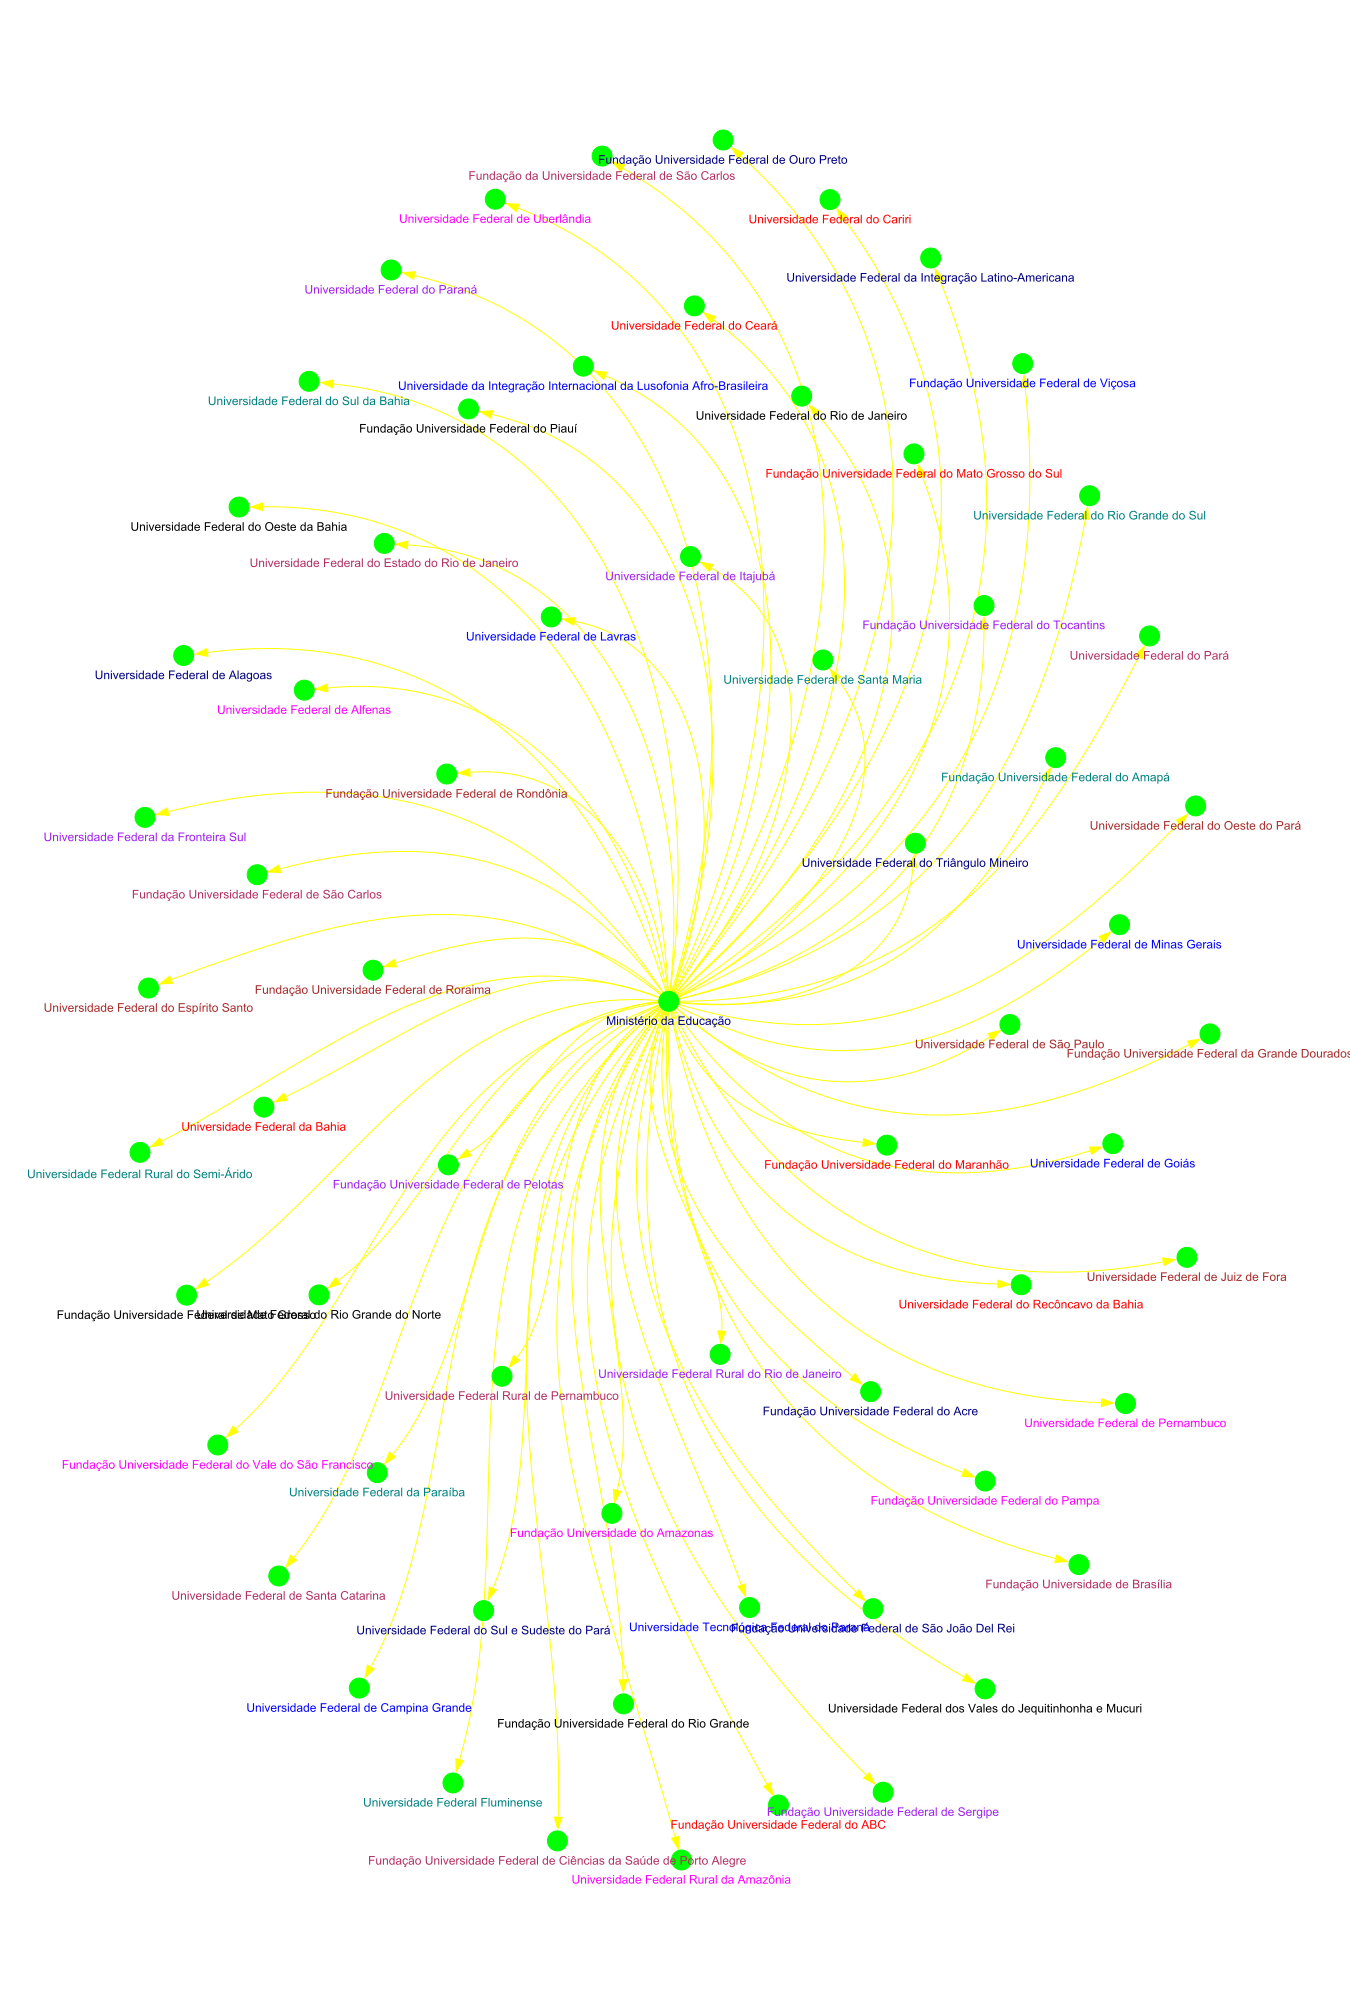

In [5]:
out_fig_name2019 = "grafo2019.eps"
grafo2019 = pickle.load(open("grafo2019.pkl", "rb"))
visual_style = {}
visual_style["bbox"] = (1350,2000)
visual_style["margin"] = 140
visual_style["vertex_color"] = 'green'
visual_style["vertex_frame_color"] = 'green'
visual_style["vertex_label_dist"] = 1.5
visual_style["edge_color"] = 'yellow'
visual_style["vertex_size"] = 20
visual_style["vertex_label_size"] = 12
visual_style["vertex_label_color"] = ['navy','maroon','black','blue','red',\
                                      'brown','fuchsia','teal','purple']
visual_style["edge_curved"] = True
#visual_style["layout"] = grafo2019.layout_reingold_tilford_circular()
print(grafo2019.summary())
plot(grafo2019, out_fig_name2019, **visual_style)

IGRAPH DN-- 69 68 -- Unidades Organizacionais da Administração Pública - 2020
+ attr: name (g), label (v), name (v)


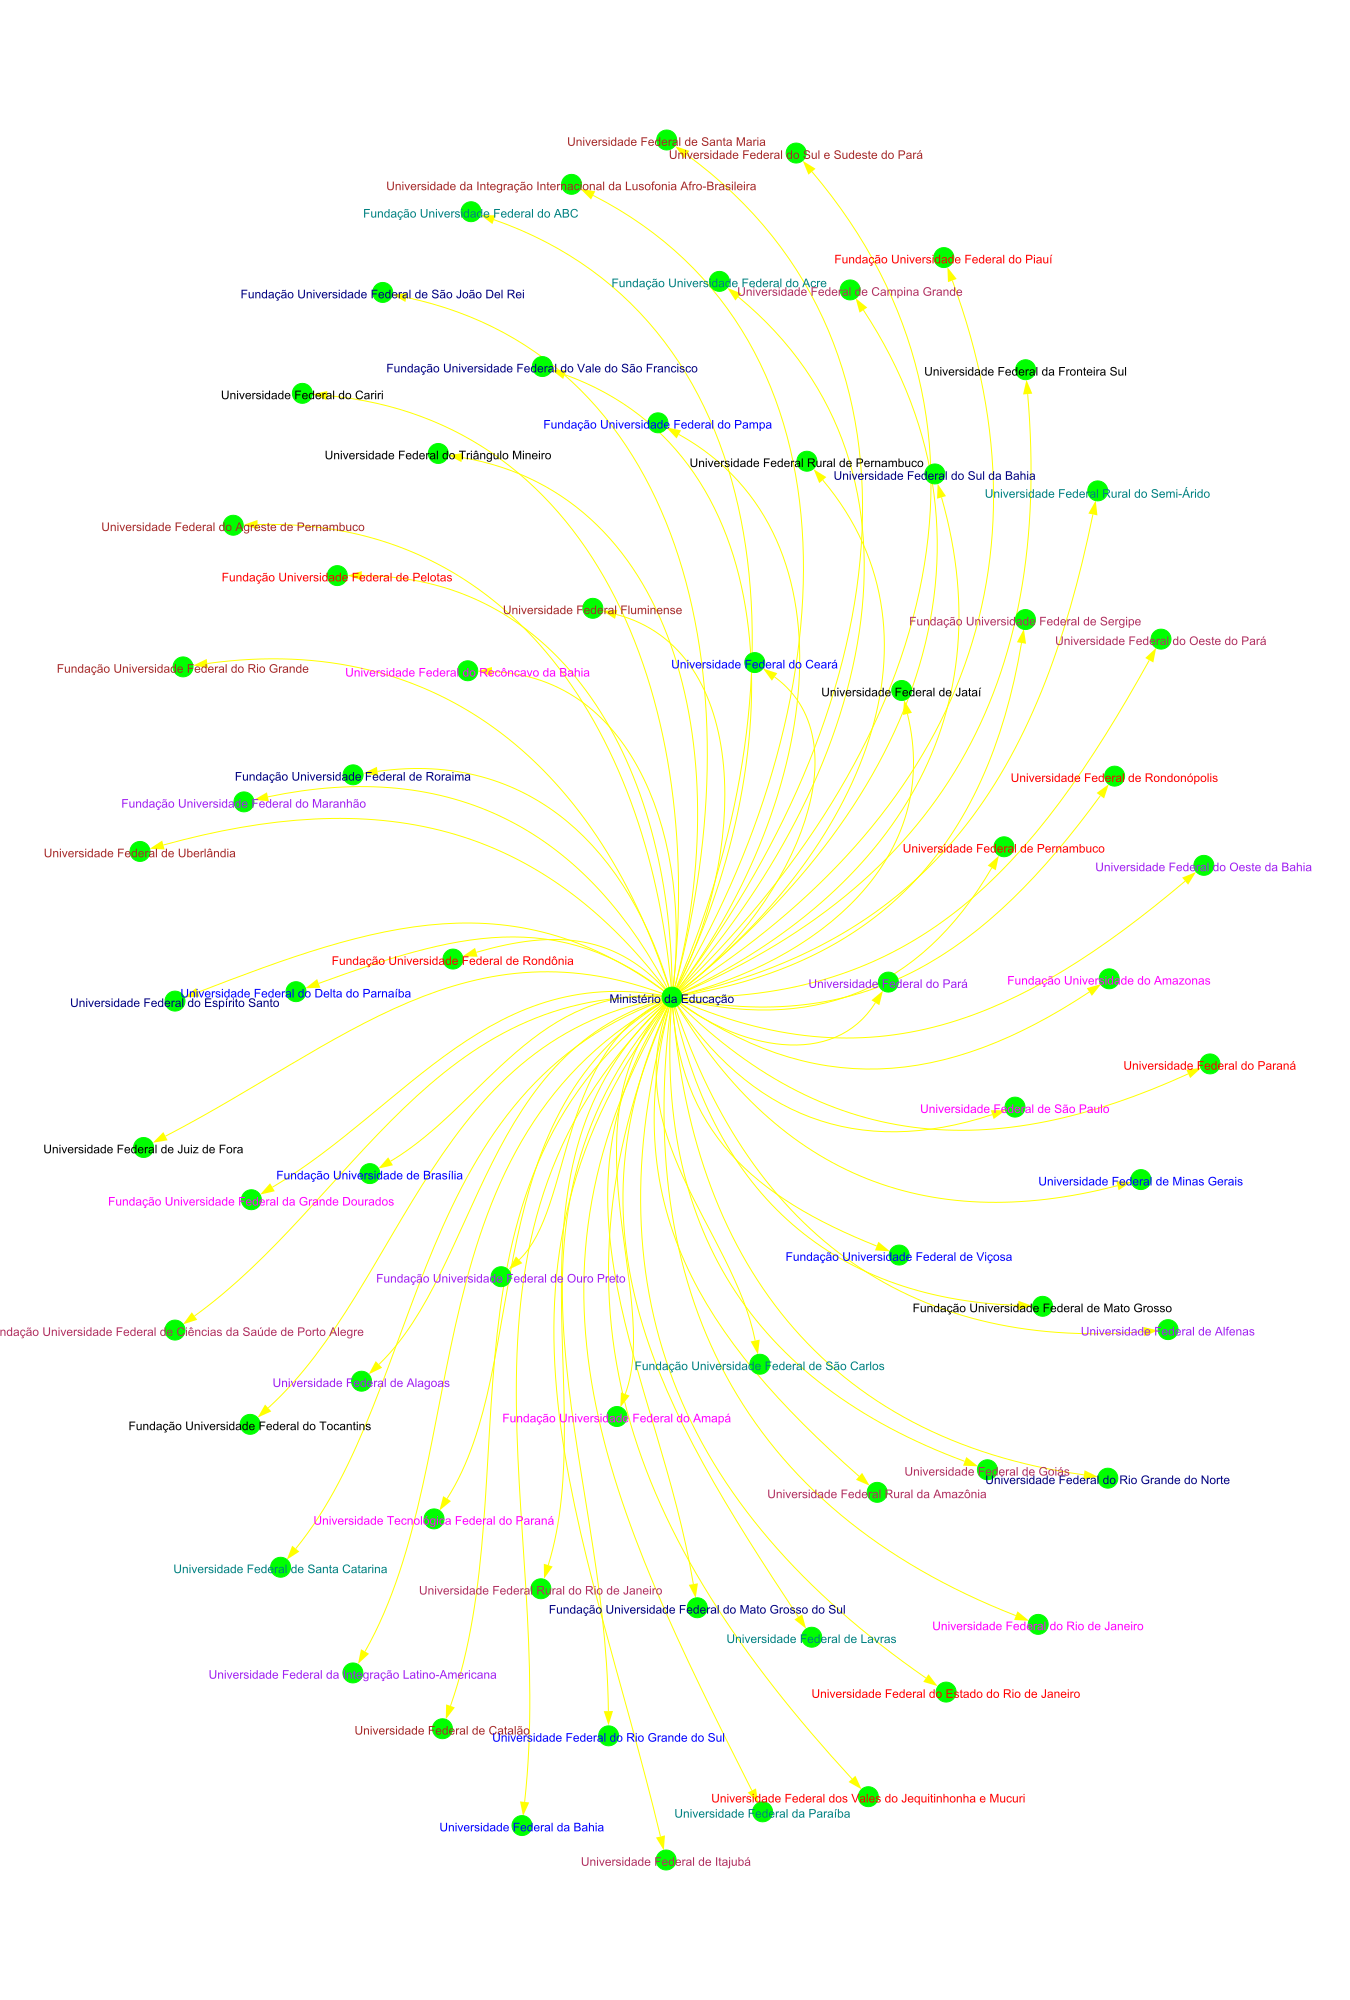

In [6]:
out_fig_name2020 = "grafo2020.eps"
grafo2020 = pickle.load(open("grafo2020.pkl", "rb"))
visual_style = {}
visual_style["bbox"] = (1350,2000)
visual_style["margin"] = 140
visual_style["vertex_color"] = 'green'
visual_style["vertex_frame_color"] = 'green'
#visual_style["vertex_label_dist"] = 1.5
#visual_style["vertex_label_angle"] = 0
visual_style["edge_color"] = 'yellow'
visual_style["vertex_size"] = 20
visual_style["vertex_label_size"] = 12
visual_style["vertex_label_color"] = ['navy','maroon','black','blue','red',\
                                      'brown','fuchsia','teal','purple']
visual_style["edge_curved"] = True
#visual_style["layout"] = grafo2020.layout_reingold_tilford_circular()
print(grafo2020.summary())
plot(grafo2020, out_fig_name2020, **visual_style)

IGRAPH DN-- 70 69 -- Unidades Organizacionais da Administração Pública - 2021
+ attr: name (g), label (v), name (v)


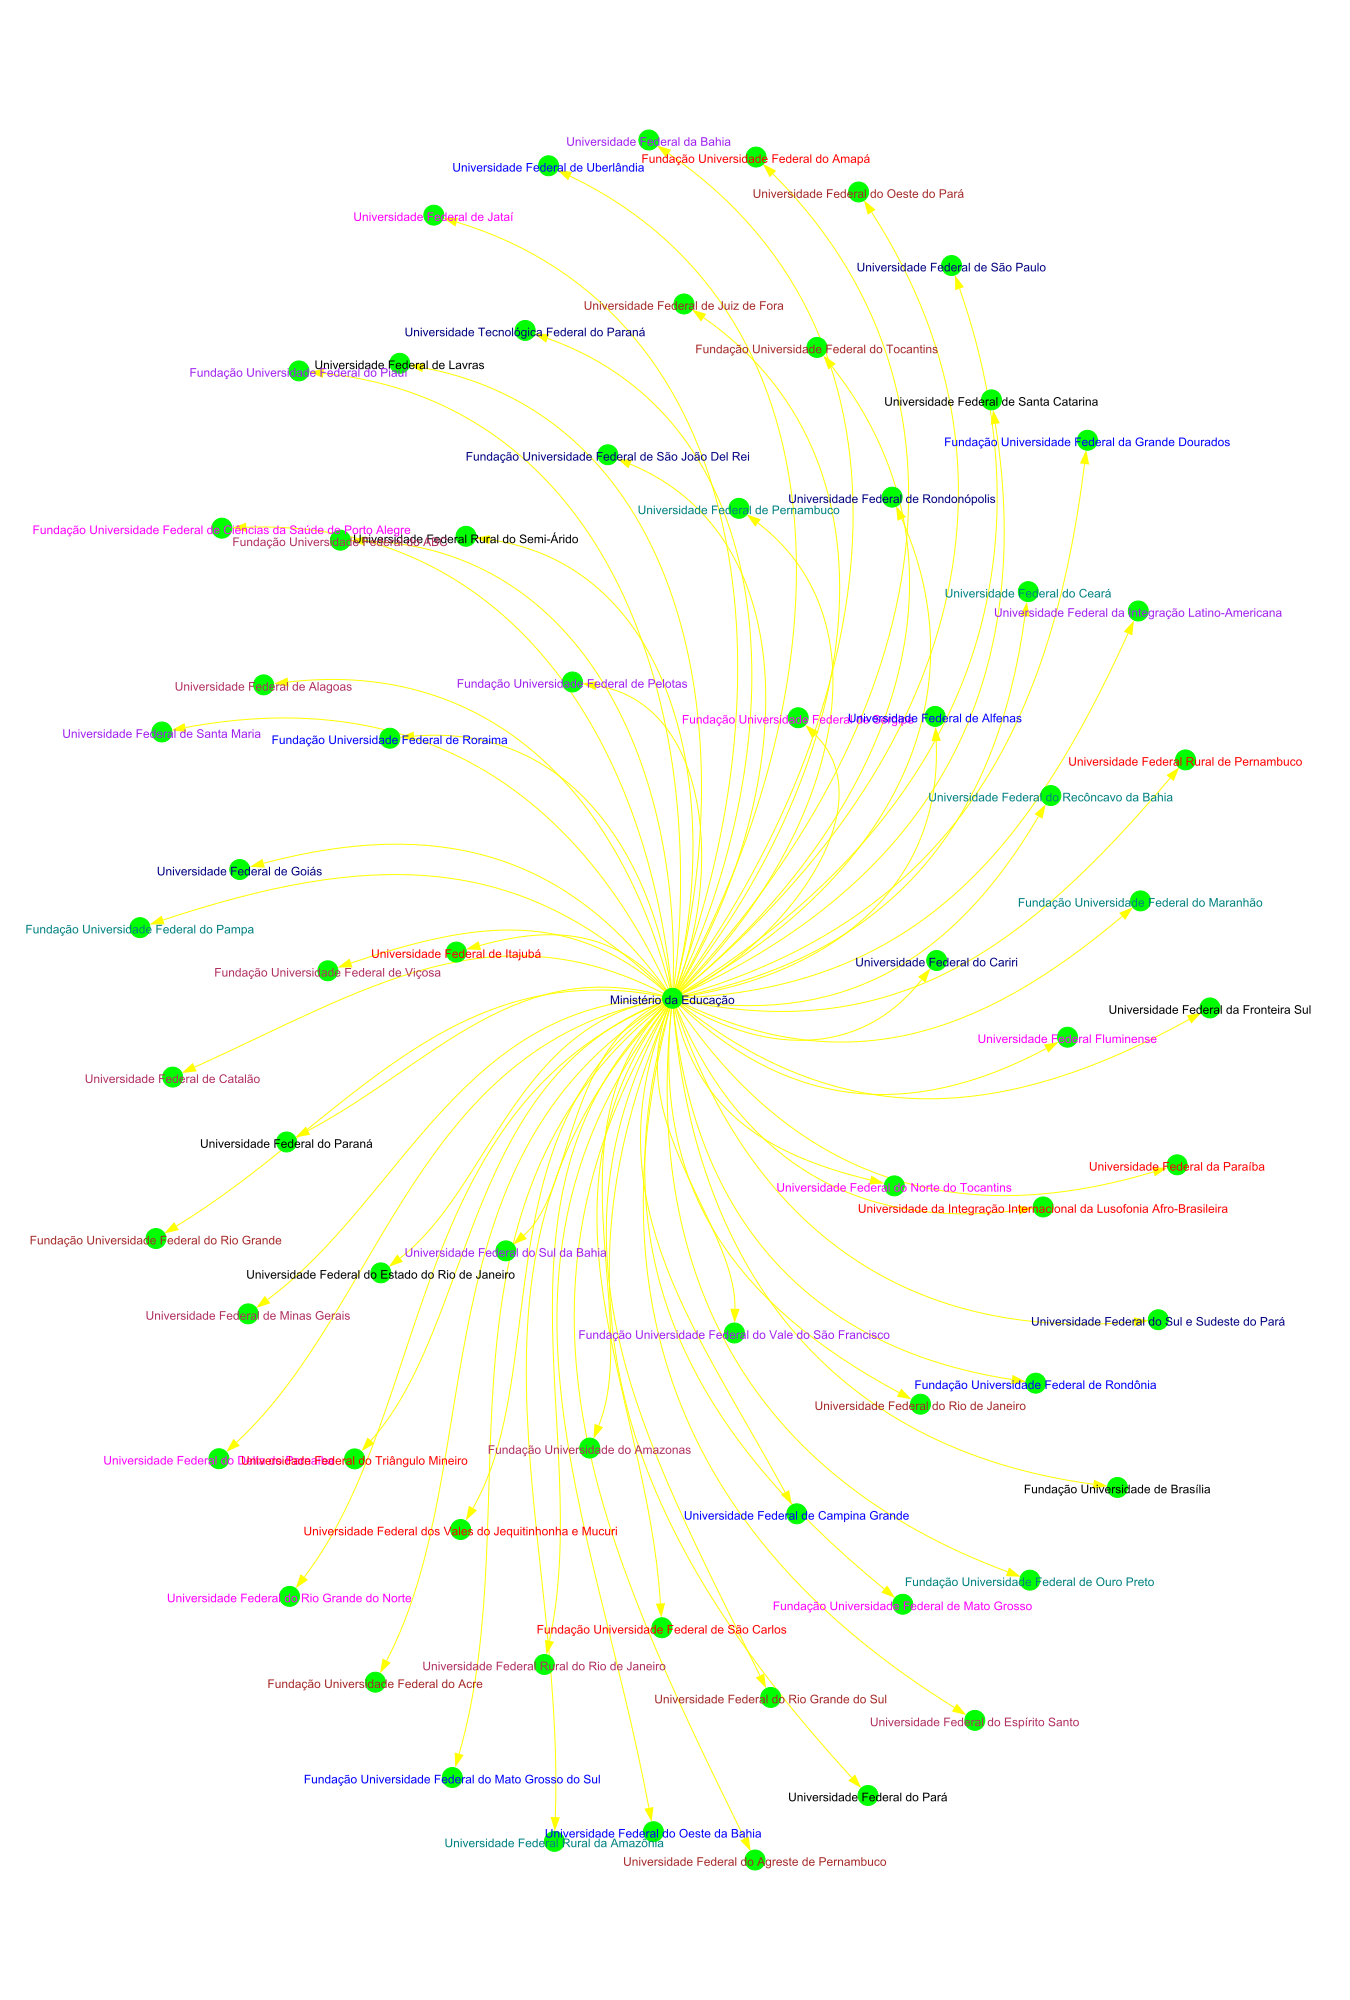

In [7]:
out_fig_name2021 = "grafo2021.eps"
grafo2021 = pickle.load(open("grafo2021.pkl", "rb"))
print(grafo2021.summary())
visual_style = {}
visual_style["bbox"] = (1350,2000)
visual_style["margin"] = 140
visual_style["vertex_color"] = 'green'
visual_style["vertex_frame_color"] = 'green'
#visual_style["vertex_label_dist"] = 1.5
#visual_style["vertex_label_angle"] = 0
visual_style["edge_color"] = 'yellow'
visual_style["vertex_size"] = 20
visual_style["vertex_label_size"] = 12
visual_style["vertex_label_color"] = ['navy','maroon','black','blue','red',\
                                      'brown','fuchsia','teal','purple']
visual_style["edge_curved"] = True
#visual_style["layout"] = grafo2021.layout_reingold_tilford_circular()
plot(grafo2021, out_fig_name2021, **visual_style)

IGRAPH DN-- 71 70 -- Unidades Organizacionais da Administração Pública - 2022
+ attr: name (g), label (v), name (v)


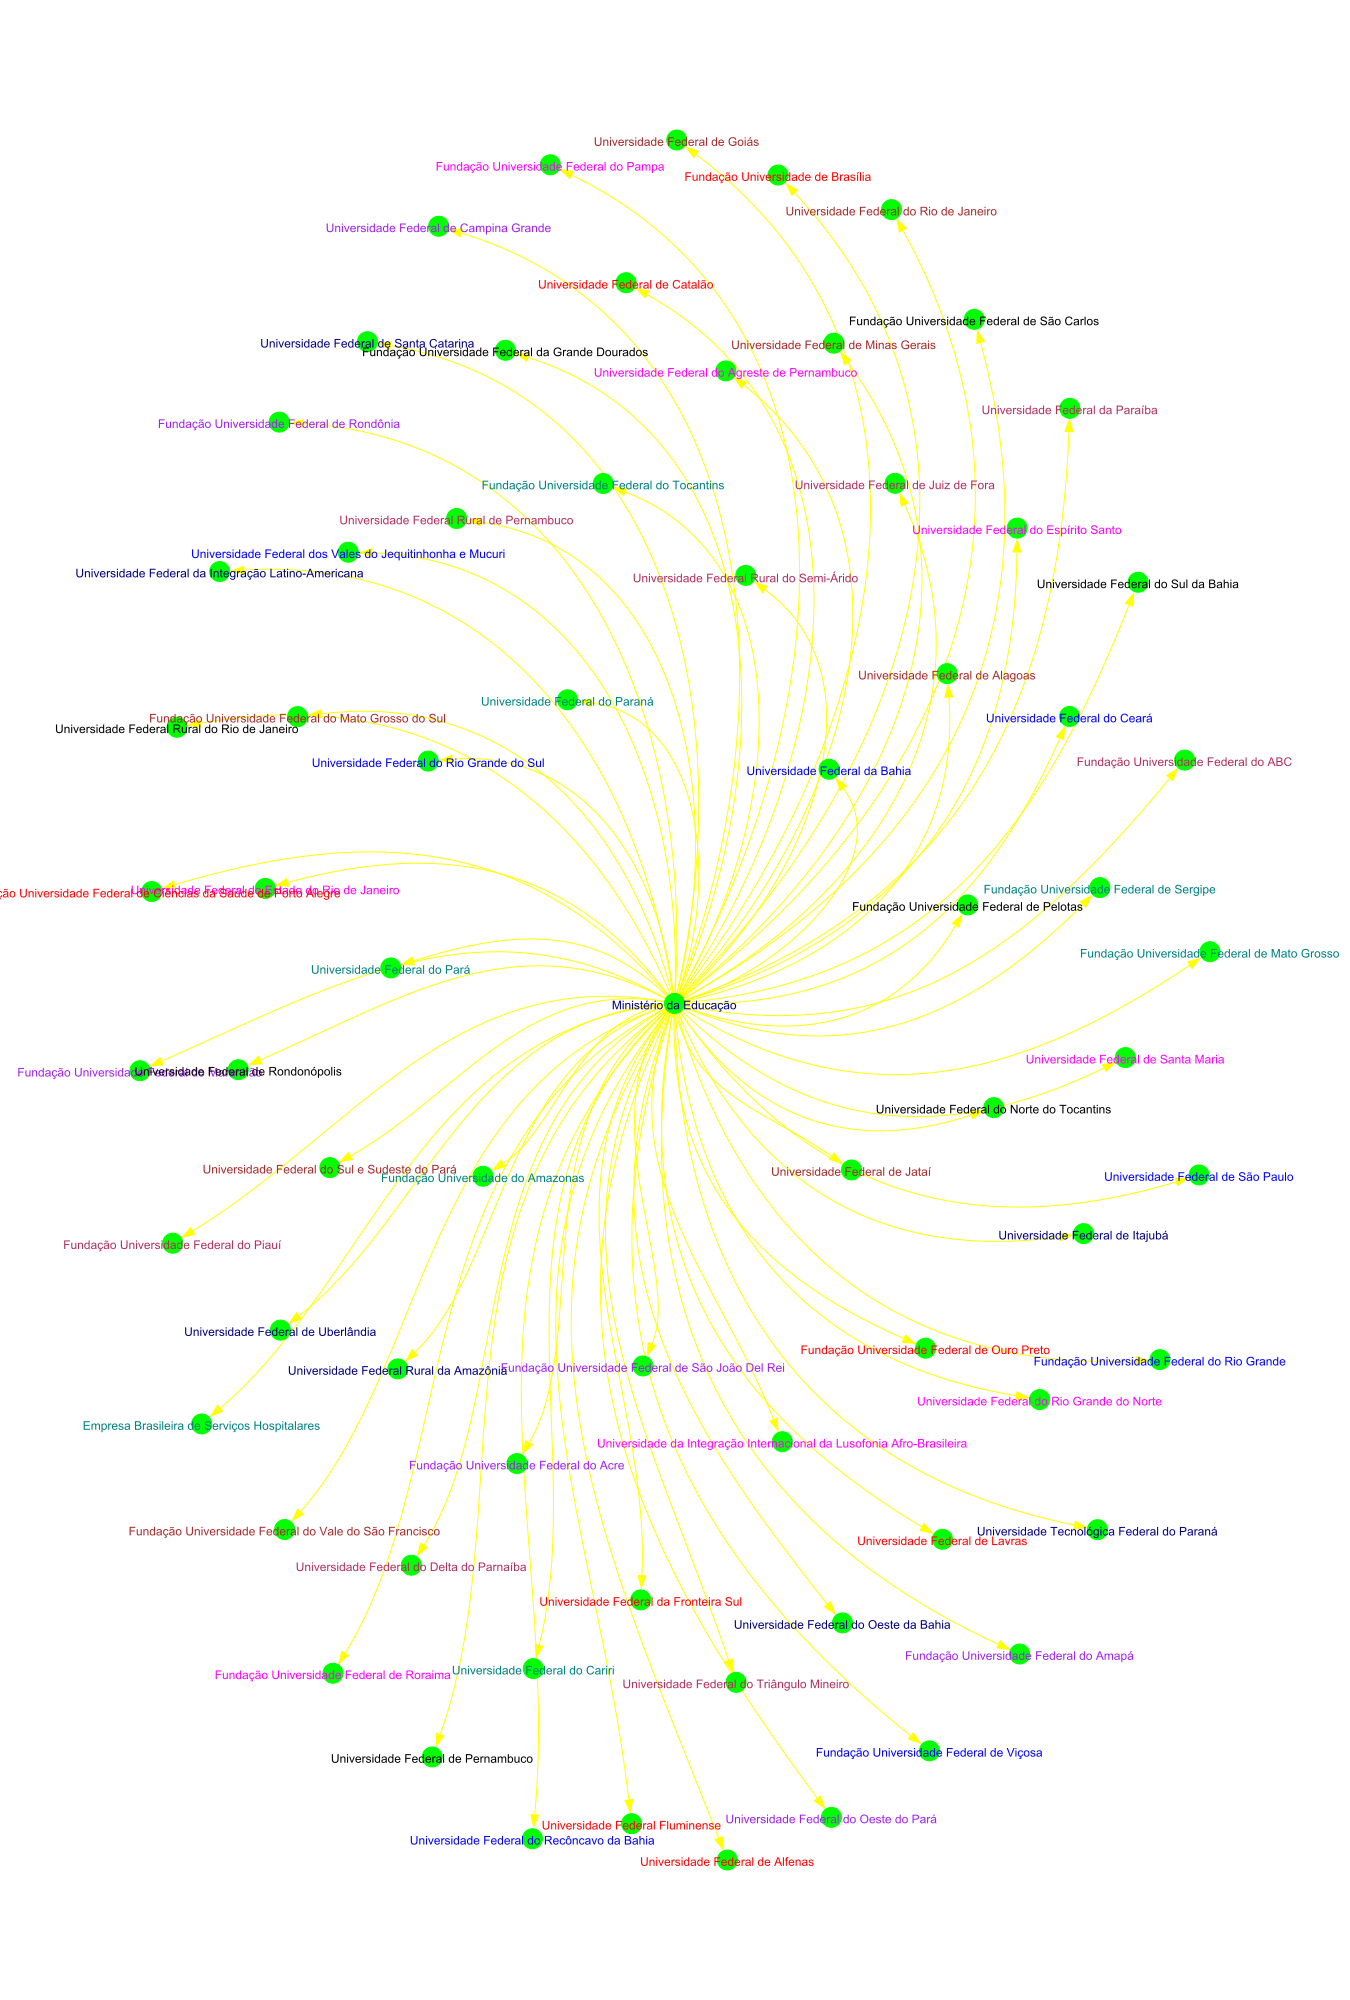

In [8]:
out_fig_name2022 = "grafo2022.eps"
grafo2022 = pickle.load(open("grafo2022.pkl", "rb"))
print(grafo2022.summary())
visual_style = {}
visual_style["bbox"] = (1350,2000)
visual_style["margin"] = 140
visual_style["vertex_color"] = 'green'
visual_style["vertex_frame_color"] = 'green'
#visual_style["vertex_label_dist"] = 1.5
#visual_style["vertex_label_angle"] = 0
visual_style["edge_color"] = 'yellow'
visual_style["vertex_size"] = 20
visual_style["vertex_label_size"] = 12
visual_style["vertex_label_color"] = ['navy','maroon','black','blue','red',\
                                      'brown','fuchsia','teal','purple']
visual_style["edge_curved"] = True
#visual_style["layout"] = grafo2022.layout_reingold_tilford_circular()
plot(grafo2022, out_fig_name2022, **visual_style)

In [9]:
print(grafo2019.summary())
print(grafo2020.summary())
print(grafo2021.summary())
print(grafo2022.summary())


IGRAPH DN-- 65 64 -- Unidades Organizacionais da Administração Pública - 2019
+ attr: name (g), label (v), name (v)
IGRAPH DN-- 69 68 -- Unidades Organizacionais da Administração Pública - 2020
+ attr: name (g), label (v), name (v)
IGRAPH DN-- 70 69 -- Unidades Organizacionais da Administração Pública - 2021
+ attr: name (g), label (v), name (v)
IGRAPH DN-- 71 70 -- Unidades Organizacionais da Administração Pública - 2022
+ attr: name (g), label (v), name (v)


IGRAPH DN-- 5 4 -- Unidades Organizacionais da Administração Pública - 2020
+ attr: name (g), label (v), name (v)


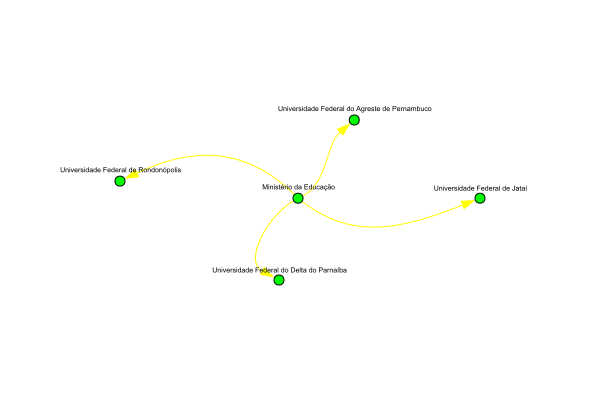

In [10]:
diff_in_2020 = grafo2020.difference(grafo2019)
sub_diff_in_2020 = diff_in_2020.subgraph_edges(diff_in_2020.es)
print(sub_diff_in_2020.summary())
visual_style = {}
visual_style["bbox"] = (600,400)
visual_style["margin"] = 120
visual_style["vertex_color"] = 'green'
visual_style["vertex_label_dist"] = 1.5
visual_style["vertex_label_angle"] = 1.5
visual_style["edge_color"] = 'yellow'
visual_style["vertex_size"] = 10
visual_style["vertex_label_size"] = 7
visual_style["edge_curved"] = True
visual_style["layout"] = sub_diff_in_2020.layout_reingold_tilford_circular()
plot(sub_diff_in_2020, "sub_diff_in_2020.eps", **visual_style)

In [11]:
for vx in sub_diff_in_2020.vs:
        print(len(sub_diff_in_2020.vs),vx.attributes())
        print("------------------------------------") 
for es in sub_diff_in_2020.es:
        print(len(sub_diff_in_2020.es), es.source_vertex["name"],"---->", es.target_vertex["name"],es.attributes())
        print("------------------------------------") 

5 {'name': 'Ministério da Educação', 'label': 'Ministério da Educação'}
------------------------------------
5 {'name': 'Universidade Federal de Jataí', 'label': 'Universidade Federal de Jataí'}
------------------------------------
5 {'name': 'Universidade Federal do Delta do Parnaíba', 'label': 'Universidade Federal do Delta do Parnaíba'}
------------------------------------
5 {'name': 'Universidade Federal de Rondonópolis', 'label': 'Universidade Federal de Rondonópolis'}
------------------------------------
5 {'name': 'Universidade Federal do Agreste de Pernambuco', 'label': 'Universidade Federal do Agreste de Pernambuco'}
------------------------------------
4 Ministério da Educação ----> Universidade Federal do Agreste de Pernambuco {}
------------------------------------
4 Ministério da Educação ----> Universidade Federal de Rondonópolis {}
------------------------------------
4 Ministério da Educação ----> Universidade Federal do Delta do Parnaíba {}
----------------------------

IGRAPH DN-- 2 1 -- Unidades Organizacionais da Administração Pública - 2021
+ attr: name (g), label (v), name (v)


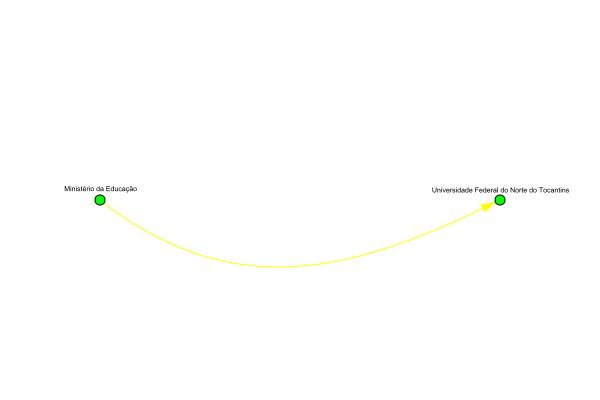

In [12]:
diff_in_2021 = grafo2021.difference(grafo2020)
sub_diff_in_2021 = diff_in_2021.subgraph_edges(diff_in_2021.es)
print(sub_diff_in_2021.summary())
visual_style["margin"] = 100
visual_style["layout"] = sub_diff_in_2021.layout_reingold_tilford_circular()
plot(sub_diff_in_2021, "sub_diff_in_2021.eps", **visual_style)

In [13]:
for vx in sub_diff_in_2021.vs:
        print(len(sub_diff_in_2021.vs),vx.attributes())
        print("------------------------------------") 
for es in sub_diff_in_2021.es:
        print(len(sub_diff_in_2021.es), es.source_vertex["name"],"---->", es.target_vertex["name"],es.attributes())
        print("------------------------------------") 

2 {'name': 'Ministério da Educação', 'label': 'Ministério da Educação'}
------------------------------------
2 {'name': 'Universidade Federal do Norte do Tocantins', 'label': 'Universidade Federal do Norte do Tocantins'}
------------------------------------
1 Ministério da Educação ----> Universidade Federal do Norte do Tocantins {}
------------------------------------


IGRAPH DN-- 2 1 -- Unidades Organizacionais da Administração Pública - 2022
+ attr: name (g), label (v), name (v)


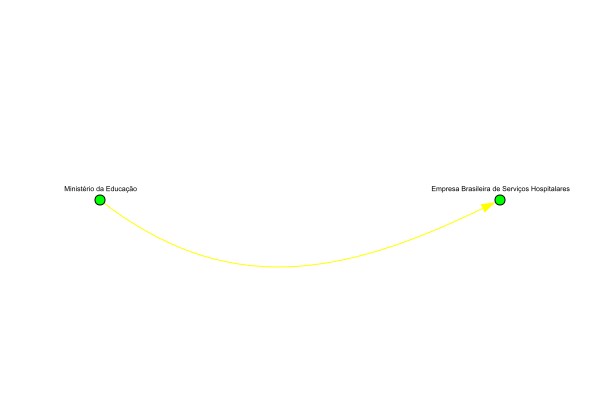

In [14]:
diff_in_2022 = grafo2022.difference(grafo2021)
sub_diff_in_2022 = diff_in_2022.subgraph_edges(diff_in_2022.es)
print(sub_diff_in_2022.summary())
visual_style["margin"] = 100
visual_style["layout"] = sub_diff_in_2022.layout_reingold_tilford_circular()
plot(sub_diff_in_2022, "sub_diff_in_2022.eps", **visual_style)

In [15]:
for vx in sub_diff_in_2022.vs:
        print(len(sub_diff_in_2022.vs),vx.attributes())
        print("------------------------------------") 
for es in sub_diff_in_2022.es:
        print(len(sub_diff_in_2022.es), es.source_vertex["name"],"---->", es.target_vertex["name"],es.attributes())
        print("------------------------------------") 

2 {'name': 'Ministério da Educação', 'label': 'Ministério da Educação'}
------------------------------------
2 {'name': 'Empresa Brasileira de Serviços Hospitalares', 'label': 'Empresa Brasileira de Serviços Hospitalares'}
------------------------------------
1 Ministério da Educação ----> Empresa Brasileira de Serviços Hospitalares {}
------------------------------------


IGRAPH DN-- 71 6 -- Unidades Organizacionais da Administração Pública - 2022
+ attr: name (g), label (v), name (v)
IGRAPH DN-- 7 6 -- Unidades Organizacionais da Administração Pública - 2022
+ attr: name (g), label (v), name (v)
IGRAPH DN-- 71 6 -- Unidades Organizacionais da Administração Pública - 2022
+ attr: name (g), label (v), name (v)


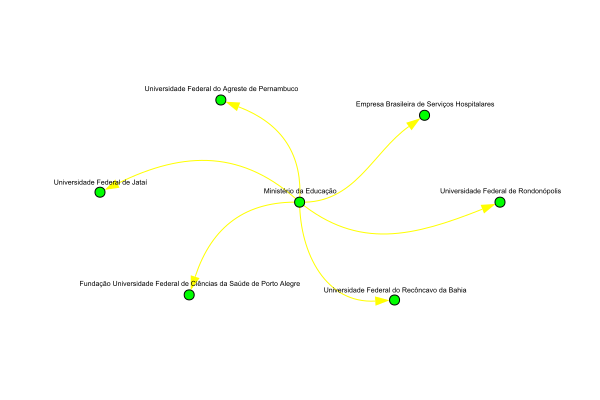

In [17]:
diff_in_2022_2019 = grafo2022.difference(grafo2019)
sub_diff_in_2022_2019 = diff_in_2022_2019.subgraph_edges(diff_in_2022_2019.es)
sub_diff_in_2022_2019_vs = diff_in_2022_2019.subgraph(diff_in_2022_2019.vs)
print(diff_in_2022_2019.summary())
print(sub_diff_in_2022_2019.summary())
print(sub_diff_in_2022_2019_vs.summary())
visual_style["margin"] = 100
visual_style["layout"] = sub_diff_in_2022_2019.layout_reingold_tilford_circular()
plot(sub_diff_in_2022_2019, "sub_diff_in_2022_2019.eps", **visual_style)

In [18]:
for vx in sub_diff_in_2022_2019.vs:
        print(len(sub_diff_in_2022_2019.vs),vx.attributes())
        print("------------------------------------") 
for es in sub_diff_in_2022_2019.es:
        print(len(sub_diff_in_2022_2019.es), es.source_vertex["name"],"---->", es.target_vertex["name"],es.attributes())
        print("------------------------------------") 

7 {'name': 'Ministério da Educação', 'label': 'Ministério da Educação'}
------------------------------------
7 {'name': 'Universidade Federal de Rondonópolis', 'label': 'Universidade Federal de Rondonópolis'}
------------------------------------
7 {'name': 'Universidade Federal do Recôncavo da Bahia', 'label': 'Universidade Federal do Recôncavo da Bahia'}
------------------------------------
7 {'name': 'Fundação Universidade Federal de Ciências da Saúde de Porto Alegre', 'label': 'Fundação Universidade Federal de Ciências da Saúde de Porto Alegre'}
------------------------------------
7 {'name': 'Universidade Federal de Jataí', 'label': 'Universidade Federal de Jataí'}
------------------------------------
7 {'name': 'Universidade Federal do Agreste de Pernambuco', 'label': 'Universidade Federal do Agreste de Pernambuco'}
------------------------------------
7 {'name': 'Empresa Brasileira de Serviços Hospitalares', 'label': 'Empresa Brasileira de Serviços Hospitalares'}
----------------

In [19]:
big_frame

,id,tipo,emissor,data,responsavel,cargo
0,S01012019/1020_20190112_991201162-2,Decreto numerado,Atos do Poder Judiciário,12/01/2019,NaN,NaN
1,S01012019/1020_20190116_11391945,Lei,Atos do Poder Legislativo,16/01/2019,JAIR MESSIAS BOLSONARO,NaN
2,S01012019/515_20190102_11303736,Alvará,Ministério da Segurança Pública/Departamento d...,02/01/2019,ROSILENE GLEICE DUARTE SANTIAGO,NaN
3,S01012019/515_20190102_11303780,Alvará,Ministério da Segurança Pública/Departamento d...,02/01/2019,ROSILENE GLEICE DUARTE SANTIAGO,NaN
4,S01012019/515_20190102_11303801,Portaria,"Ministério da Ciência, Tecnologia, Inovações e...",02/01/2019,VILMA DE FÁTIMA ALVARENGA FANIS,NaN
...,...,...,...,...,...,...
3233679,S03112022/609_20221130_20116254,Aviso de Suspensão,Ministério da Defesa/Comando da Marinha/Empres...,30/11/2022,NAIR CARLA FROMENT TEIXEIRA,Pregoeira
3233680,S03112022/609_20221130_20116255,Resultado de Julgamento,Ministério da Economia/Empresa de Tecnologia e...,30/11/2022,MARIO HENRIQUE BERNARDO DA SILVA,Pregoeiro
3233681,S03112022/609_20221130_20116333,Extrato de Termo Aditivo,Ministério das Comunicações/Empresa Brasileira...,30/11/2022,NaN,NaN
3233682,S03112022/609_20221130_20116336,Extrato de Contrato,Ministério das Comunicações/Empresa Brasileira...,30/11/2022,NaN,NaN


IGRAPH DN-- 0 0 -- Unidades Organizacionais da Administração Pública - 2019
+ attr: name (g), label (v), name (v)


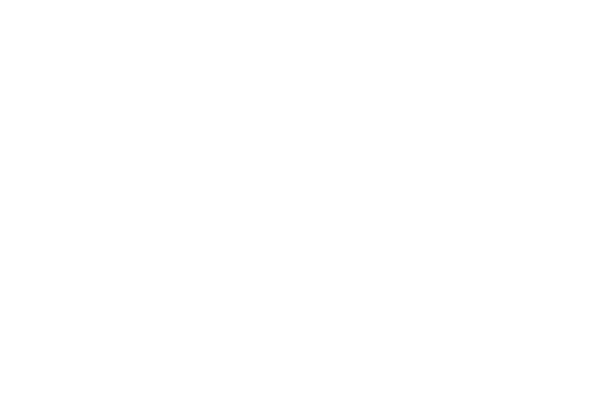

In [20]:
diff_out_2019_2022 = grafo2019.difference(grafo2022)
sub_diff_out_2019_2022 = diff_out_2019_2022.subgraph_edges(diff_in_2022.es)
print(sub_diff_out_2019_2022.summary())
visual_style["margin"] = 100
visual_style["layout"] = sub_diff_out_2019_2022.layout_reingold_tilford_circular()
plot(sub_diff_out_2019_2022, "sub_diff_out_2019_2022.eps", **visual_style)

In [22]:
df_filtro = big_frame[big_frame["emissor"].str.contains('Ministério da Educação')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Universidade')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Agreste de Pernambuco')]
df_filtro


,id,tipo,emissor,data,responsavel,cargo
1374158,S03122020/530_20201216_13160482,Aviso de Licitação-Pregão,Ministério da Educação/Universidade Federal do...,16/12/2020,CARLOS WILLIAN FERREIRA DE ARAUJO,Pregoeiro
1374186,S03122020/530_20201216_13160546,Aviso de Licitação-Pregão,Ministério da Educação/Universidade Federal do...,16/12/2020,CARLOS WILLIAN FERREIRA DE ARAUJO,Pregoeiro
1377090,S03122020/530_20201217_13164507,Aviso de Licitação-Pregão,Ministério da Educação/Universidade Federal do...,17/12/2020,CARLOS WILLIAN FERREIRA DE ARAUJO,Pregoeiro
1380089,S03122020/530_20201218_13168558,Aviso de Licitação-Pregão,Ministério da Educação/Universidade Federal do...,18/12/2020,CARLOS WILLIAN FERREIRA DE ARAUJO,Pregoeiro
1512944,S03022021/530_20210226_13313167,Extrato de Contrato,Ministério da Educação/Universidade Federal do...,26/02/2021,NaN,NaN
...,...,...,...,...,...,...
3223977,S03112022/530_20221124_20100377,Aviso de Anulação,Ministério da Educação/Universidade Federal do...,24/11/2022,HEITOR HUGO RINO DE PAULA JUNIOR,Pregoeiro
3223978,S03112022/530_20221124_20100378,Aviso de Anulação,Ministério da Educação/Universidade Federal do...,24/11/2022,CARLOS WILLIAN FERREIRA DE ARAUJO,Diretor do Departamento de Compras
3226815,S03112022/530_20221125_20104349,Aviso de Licitação-Pregão,Ministério da Educação/Universidade Federal do...,25/11/2022,HEITOR HUGO RINO DE PAULA JUNIOR,Pregoeiro
3232024,S03112022/530_20221129_20111609,Aviso de Licitação-Pregão,Ministério da Educação/Universidade Federal do...,29/11/2022,CARLOS WILLIAN FERREIRA DE ARAUJO,Pregoeiro


In [23]:
df_filtro = big_frame[big_frame["emissor"].str.contains('Ministério da Educação')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Universidade')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Federal de Jataí')]
df_filtro

,id,tipo,emissor,data,responsavel,cargo
652419,S02012020/529_20200129_12388301,Portaria,Ministério da Educação/Universidade Federal de...,29/01/2020,Américo Nunes da Silveira Neto,NaN
709884,S02022020/529_20200205_12407307,Portaria,Ministério da Educação/Universidade Federal de...,05/02/2020,Giulena Rosa Leite,NaN
711604,S02022020/529_20200210_12417405,Portaria,Ministério da Educação/Universidade Federal de...,10/02/2020,Américo Nunes da Silveira Neto,NaN
712749,S02022020/529_20200212_12424380,Portaria,Ministério da Educação/Universidade Federal de...,12/02/2020,Americo Nunes da Silveira Neto,NaN
714681,S02022020/529_20200217_12435520,Retificação,Ministério da Educação/Universidade Federal de...,17/02/2020,NaN,NaN
...,...,...,...,...,...,...
3182566,S03112022/530_20221104_20043618,Edital de Processo Seletivo,Ministério da Educação/Universidade Federal de...,04/11/2022,Américo Nunes da Silveira Neto,NaN
3182628,S03112022/530_20221104_20043713,Extrato de Termo Aditivo,Ministério da Educação/Universidade Federal de...,04/11/2022,NaN,NaN
3192611,S03112022/530_20221109_20057431,Aviso de Licitação-Pregão,Ministério da Educação/Universidade Federal de...,09/11/2022,AMERICO NUNES DA SILVEIRA NETO,Reitor Pró Tempore
3218267,S03112022/530_20221123_20092633,Edital,Ministério da Educação/Universidade Federal de...,23/11/2022,Hanstter Hallison Alves Rezende,NaN


In [24]:
df_filtro = big_frame[big_frame["emissor"].str.contains('Ministério da Educação')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Universidade')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Ciências da Saúde de Porto Alegre')]
df_filtro

,id,tipo,emissor,data,responsavel,cargo
5625,S02012019/529_20190102_11343015,Portaria,Ministério da Educação/Fundação Universidade F...,02/01/2019,LUCIA CAMPOS PELLANDA,NaN
5632,S02012019/529_20190102_11343770,Portaria,Ministério da Educação/Fundação Universidade F...,02/01/2019,LUCIA CAMPOS PELLANDA,NaN
5637,S02012019/529_20190102_11345612,Portaria,Ministério da Educação/Fundação Universidade F...,02/01/2019,LUCIA CAMPOS PELLANDA,NaN
6556,S02012019/529_20190104_11366189,Portaria,Ministério da Educação/Fundação Universidade F...,04/01/2019,JENIFER SAFFI,NaN
7578,S02012019/529_20190108_11370605,Despacho,Ministério da Educação/Fundação Universidade F...,08/01/2019,LUCIA CAMPOS PELLANDA,NaN
...,...,...,...,...,...,...
3212012,S03112022/530_20221121_20083817,Aviso de Licitação-Pregão,Ministério da Educação/Fundação Universidade F...,21/11/2022,LUCIANA PIERRY DUERREWALD,Pregoeira
3225383,S03112022/530_20221125_20102272,Aviso de Licitação-Pregão,Ministério da Educação/Fundação Universidade F...,25/11/2022,LUCIANA PIERRY DUERREWALD,Pregoeira
3227676,S03112022/530_20221125_20105535,Extrato de Contrato,Ministério da Educação/Fundação Universidade F...,25/11/2022,NaN,NaN
3229865,S03112022/530_20221128_20108525,Resultado de Habilitação,Ministério da Educação/Fundação Universidade F...,28/11/2022,LUCIANA PIERRY DUERREWALD,Presidente CPL


In [25]:
df_filtro = big_frame[big_frame["emissor"].str.contains('Ministério da Educação')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Universidade')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Recôncavo da Bahia')]
df_filtro

,id,tipo,emissor,data,responsavel,cargo
4870,S01012019/515_20190131_11426888,Portaria,Ministério da Educação/Universidade Federal do...,31/01/2019,Silvio Luiz de Oliveira Soglia,NaN
5653,S02012019/529_20190102_11351714,Portaria,Ministério da Educação/Universidade Federal do...,02/01/2019,SILVIO LUIZ DE OLIVEIRA SOGLIA,NaN
6496,S02012019/529_20190104_11365712,Portaria,Ministério da Educação/Universidade Federal do...,04/01/2019,Silvio Luiz de Oliveira Soglia,NaN
7731,S02012019/529_20190108_11372286,Portaria,Ministério da Educação/Universidade Federal do...,08/01/2019,WAGNER TAVARES DA SILVA,NaN
8419,S02012019/529_20190110_11376250,Portaria,Ministério da Educação/Universidade Federal do...,10/01/2019,Georgina Gonçalves dos Santos,NaN
...,...,...,...,...,...,...
3218394,S03112022/530_20221123_20092804,Extrato de Contrato,Ministério da Educação/Universidade Federal do...,23/11/2022,NaN,NaN
3220220,S03112022/530_20221123_20095308,Extrato de Convênio,Ministério da Educação/Universidade Federal do...,23/11/2022,NaN,NaN
3224106,S03112022/530_20221124_20100515,Extrato de Convênio,Ministério da Educação/Universidade Federal do...,24/11/2022,NaN,NaN
3228665,S03112022/530_20221128_20106831,Aviso de Licitação-Pregão,Ministério da Educação/Universidade Federal do...,28/11/2022,JORGE CONCEICAO DE ALMEIDA,Chefe do Núcleo de Gestão de Licitação


In [26]:
df_filtro = big_frame[big_frame["emissor"].str.contains('Ministério da Educação')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Universidade')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Rondonópolis')]
df_filtro

,id,tipo,emissor,data,responsavel,cargo
121590,S03022019/530_20190225_11487437,Edital de Processo Seletivo,Ministério da Educação/Fundação Universidade F...,25/02/2019,HEINSTEN FREDERICH LEAL DOS SANTOS,Diretor
125921,S03022019/530_20190227_11494541,Edital de Processo Seletivo,Ministério da Educação/Fundação Universidade F...,27/02/2019,HEINSTEN FREDERICH LEAL DOS SANTOS,Diretor
129547,S03022019/530_20190228_11500270,Edital de Processo Seletivo,Ministério da Educação/Fundação Universidade F...,28/02/2019,MERILIN BALDAN,Chefe
150314,S03032019/530_20190301_11504006,Edital de Processo Seletivo,Ministério da Educação/Fundação Universidade F...,01/03/2019,RENATO NATANIEL WASQUES,Coordenação de Ensino de Graduação em Ciências...
152927,S03032019/530_20190306_11508865,Edital de Processo Seletivo,Ministério da Educação/Fundação Universidade F...,06/03/2019,Heinsten Frederich Leal dos Santos,Diretor
...,...,...,...,...,...,...
3213200,S03112022/530_20221121_20085593,Aviso de Licitação-Pregão,Ministério da Educação/Universidade Federal de...,21/11/2022,JAILSON JOSE DE ANDRADE,Diretor de Compras e Licitação
3214965,S03112022/530_20221122_20088383,Aviso de Licitação-Pregão,Ministério da Educação/Universidade Federal de...,22/11/2022,JAILSON JOSE DE ANDRADE,Diretor de Compras e Licitação
3216761,S03112022/530_20221122_20090823,Resultado de Julgamento,Ministério da Educação/Universidade Federal de...,22/11/2022,JAILSON JOSÉ DE ANDRADE,Diretor de Compras e Licitação
3224418,S03112022/530_20221124_20101009,Extrato de Termo Aditivo,Ministério da Educação/Universidade Federal de...,24/11/2022,NaN,NaN


In [29]:
df_filtro = big_frame[big_frame["emissor"].str.contains('Ministério da Educação')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Universidade')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Sul e Sudeste do Pará')]
df_filtro

,id,tipo,emissor,data,responsavel,cargo
5862,S02012019/529_20190102_11359674,Portaria,Ministério da Educação/Universidade Federal do...,02/01/2019,Maurilio de Abreu Monteiro,NaN
6278,S02012019/529_20190103_11364411,Portaria,Ministério da Educação/Universidade Federal do...,03/01/2019,MARCEL FERREIRA MIRANDA,Em exercício
6661,S02012019/529_20190104_11367016,Portaria,Ministério da Educação/Universidade Federal do...,04/01/2019,MARCEL FERREIRA MIRANDA,Pró-Reitor de Desenvolvimento e Gestão de Pess...
6662,S02012019/529_20190104_11367017,Portaria,Ministério da Educação/Universidade Federal do...,04/01/2019,MARCEL FERREIRA MIRANDA,Pró-Reitor de Desenvolvimento e Gestão de Pess...
6712,S02012019/529_20190104_11367227,Portaria,Ministério da Educação/Universidade Federal do...,04/01/2019,MARCEL FERREIRA MIRANDA,Pró-Reitor de Desenvolvimento e Gestão de Pess...
...,...,...,...,...,...,...
3224322,S03112022/530_20221124_20100876,Extrato de Termo Aditivo,Ministério da Educação/Universidade Federal do...,24/11/2022,NaN,NaN
3229482,S03112022/530_20221128_20107969,Extrato de Contrato,Ministério da Educação/Universidade Federal do...,28/11/2022,NaN,NaN
3229903,S03112022/530_20221128_20108577,Extrato de Dispensa de Licitação,Ministério da Educação/Universidade Federal do...,28/11/2022,NaN,NaN
3230196,S03112022/530_20221128_20108965,Extrato de Apostilamento,Ministério da Educação/Universidade Federal do...,28/11/2022,NaN,NaN


In [30]:
df_filtro = big_frame[big_frame["emissor"].str.contains('Ministério da Educação')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Universidade')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Empresa Brasileira de Serviços Hospitalares')]
df_filtro

,id,tipo,emissor,data,responsavel,cargo
3047518,S03092022/530_20220919_19907093,Aviso de Chamamento Público,Ministério da Educação/Empresa Brasileira de S...,19/09/2022,Aljerry Dias do Rego,Superintendente
3047519,S03092022/530_20220919_19907108,Aviso de Chamamento Público,Ministério da Educação/Empresa Brasileira de S...,19/09/2022,Aljerry Dias do Rego,Superintendente
3067952,S03092022/530_20220928_19935983,Extrato de Contrato,Ministério da Educação/Empresa Brasileira de S...,28/09/2022,NaN,NaN
3069172,S03092022/530_20220928_19938280,Aviso de Revogação,Ministério da Educação/Empresa Brasileira de S...,28/09/2022,Aljerry Dias do Rego,Superintendente
3098435,S03102022/530_20221003_19951442,Aviso de Licitação,Ministério da Educação/Empresa Brasileira de S...,03/10/2022,Aljerry Dias do Rego,Superintendente
3136164,S03102022/530_20221020_20004282,Extrato de Contrato,Ministério da Educação/Empresa Brasileira de S...,20/10/2022,NaN,NaN
3137426,S03102022/530_20221021_20005454,Aviso de Chamamento Público,Ministério da Educação/Empresa Brasileira de S...,21/10/2022,Aljerry Dias do Rego,Superintendente
3141976,S03102022/530_20221024_20012204,Aviso de Licitação,Ministério da Educação/Empresa Brasileira de S...,24/10/2022,Aljerry Dias do Rego,Superintendente
3151102,S03102022/530_20221027_20024639,Aviso de Chamamento Público,Ministério da Educação/Empresa Brasileira de S...,27/10/2022,Aljerry Dias do Rego,Superintendente
3184779,S03112022/530_20221107_20046605,Extrato de Contrato,Ministério da Educação/Empresa Brasileira de S...,07/11/2022,NaN,NaN


In [31]:
df_filtro = big_frame[big_frame["emissor"].str.contains('Ministério da Educação')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Universidade')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Delta do Parnaíba')]
df_filtro

,id,tipo,emissor,data,responsavel,cargo
703142,S01022020/515_20200206_12407147,Resolução,Ministério da Educação/Universidade Federal do...,06/02/2020,ALEXANDRO MARINHO OLIVEIRA,NaN
704899,S01022020/515_20200213_12428217,Resolução,Ministério da Educação/Universidade Federal do...,13/02/2020,ALEXANDRO MARINHO OLIVEIRA,NaN
707297,S01022020/515_20200227_12461734,Resolução,Ministério da Educação/Universidade Federal do...,27/02/2020,ALEXANDRO MARINHO OLIVEIRA,NaN
707627,S01022020/515_20200228_12466940,Resolução,Ministério da Educação/Universidade Federal do...,28/02/2020,ALEXANDRO MARINHO OLIVEIRA,NaN
719005,S02022020/529_20200228_12467028,Ato,Ministério da Educação/Universidade Federal do...,28/02/2020,ALEXANDRO MARINHO OLIVEIRA,NaN
...,...,...,...,...,...,...
3199966,S03112022/530_20221111_20067289,Aviso,Ministério da Educação/Universidade Federal do...,11/11/2022,ALEXANDRO MARINHO OLIVEIRA,Reitor
3200084,S03112022/530_20221111_20067480,Aviso,Ministério da Educação/Universidade Federal do...,11/11/2022,ALEXANDRO MARINHO OLIVEIRA,Reitor
3217522,S03112022/530_20221122_20091926,Aviso,Ministério da Educação/Universidade Federal do...,22/11/2022,ALEXANDRO MARINHO OLIVEIRA,NaN
3217539,S03112022/530_20221122_20091961,Aviso,Ministério da Educação/Universidade Federal do...,22/11/2022,ALEXANDRO MARINHO OLIVEIRA,NaN


In [33]:
df_filtro = big_frame[big_frame["emissor"].str.contains('Ministério da Educação')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Universidade')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Fundação Universidade Federal do Piauí')]
df_filtro

,id,tipo,emissor,data,responsavel,cargo
181,S01012019/515_20190103_11364591,Ato,Ministério da Educação/Fundação Universidade F...,03/01/2019,JOSÉ ARIMATÉIA DANTAS LOPES,NaN
316,S01012019/515_20190104_11365309,Ato,Ministério da Educação/Fundação Universidade F...,04/01/2019,JOSÉ ARIMATÉIA DANTAS LOPES,NaN
359,S01012019/515_20190104_11366766,Portaria,Ministério da Educação/Fundação Universidade F...,04/01/2019,LUÍS CARLOS SALES,NaN
1006,S01012019/515_20190109_11375651,Portaria,Ministério da Educação/Fundação Universidade F...,09/01/2019,ROMINA JULIETA SANCHEZ PARADIZO DE OLIVEIRA,NaN
1971,S01012019/515_20190116_11388885,Portaria,Ministério da Educação/Fundação Universidade F...,16/01/2019,Nícia Bezerra Formiga Leite,NaN
...,...,...,...,...,...,...
3223925,S03112022/530_20221124_20100325,Extrato de Dispensa de Licitação,Ministério da Educação/Fundação Universidade F...,24/11/2022,NaN,NaN
3225629,S03112022/530_20221125_20102641,Extrato de Termo Aditivo,Ministério da Educação/Fundação Universidade F...,25/11/2022,NaN,NaN
3227501,S03112022/530_20221125_20105287,Extrato de Inexigibilidade de Licitação,Ministério da Educação/Fundação Universidade F...,25/11/2022,NaN,NaN
3229406,S03112022/530_20221128_20107860,Aviso de Licitação-Pregão,Ministério da Educação/Fundação Universidade F...,28/11/2022,CAROLINE CARMEN BARBOSA,Equipe de Apoio


In [34]:
df_filtro = big_frame[big_frame["emissor"].str.contains('Ministério da Educação')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Universidade')]
df_filtro = df_filtro[df_filtro["emissor"].str.contains('Oeste do Pará')]
df_filtro

,id,tipo,emissor,data,responsavel,cargo
6329,S02012019/529_20190103_11364680,Portaria,Ministério da Educação/Universidade Federal do...,03/01/2019,Hugo Alex Carneiro Diniz,NaN
6730,S02012019/529_20190104_11367275,Portaria,Ministério da Educação/Universidade Federal do...,04/01/2019,Hugo Alex Carneiro Diniz,NaN
8193,S02012019/529_20190109_11375312,Portaria,Ministério da Educação/Universidade Federal do...,09/01/2019,Aldenize Ruela Xavier,NaN
8289,S02012019/529_20190109_11375779,Portaria,Ministério da Educação/Universidade Federal do...,09/01/2019,Aldenize Ruela Xavier,NaN
8849,S02012019/529_20190110_11379047,Portaria,Ministério da Educação/Universidade Federal do...,10/01/2019,Marcela Cardoso Pimentel,NaN
...,...,...,...,...,...,...
3223838,S03112022/530_20221124_20100237,Extrato de Convênio,Ministério da Educação/Universidade Federal do...,24/11/2022,NaN,NaN
3225485,S03112022/530_20221125_20102425,Extrato de Termo Aditivo,Ministério da Educação/Universidade Federal do...,25/11/2022,NaN,NaN
3225761,S03112022/530_20221125_20102825,Aviso de Penalidade,Ministério da Educação/Universidade Federal do...,25/11/2022,ALDENIZE RUELA XAVIER,NaN
3233212,S03112022/609_20221130_20113163,Edital de Processo Seletivo,Ministério da Educação/Universidade Federal do...,30/11/2022,ALDENIZE RUELA XAVIER,NaN
